# Required libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
pd.set_option('display.max_columns', None)
sns.set_theme(context = 'notebook' , palette = 'seismic' , font_scale = 0.8 , style = 'darkgrid' , rc = {'figure.figsize':[16 , 7]})
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from datasist.structdata import detect_outliers
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

### read csv file 

In [3]:
df= pd.read_csv("Credit_card_data.csv" , low_memory=True)

In [4]:
df.drop('Unnamed: 0' , axis =1 , inplace=True) ### drop index coulmn 

### head of the data 

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1604,CUS_0xd40,March,Aaron Maashoh,33,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
1,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
2,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
3,0x1609,CUS_0xd40,August,NaN,23,NaN,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,22 Years and 7 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
4,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,other,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard


### func for reset index 

In [6]:
def RI(x):
    x.reset_index(inplace=True)
    return x

In [7]:
df['dummy'] = 0

### what is the Occupation for annual_income 
### -------------------------------------------------------------

In [8]:
x = df.groupby("Occupation")['Annual_Income'].sum().sort_values(ascending = False ).to_frame()
RI(x)

,Occupation,Annual_Income
0,other,1.664833e+08
1,Architect,1.590118e+08
2,Lawyer,1.587777e+08
3,Entrepreneur,1.572007e+08
4,Mechanic,1.546764e+08
5,Scientist,1.540487e+08
6,Accountant,1.532470e+08
7,Engineer,1.508631e+08
8,Doctor,1.487116e+08
9,Musician,1.486904e+08


<AxesSubplot:xlabel='Annual_Income', ylabel='Occupation'>

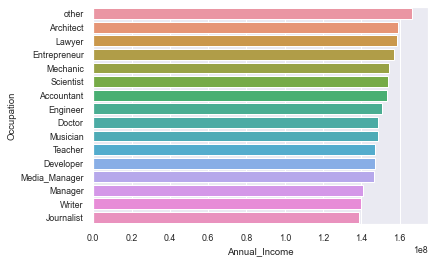

In [9]:
sns.barplot(data = x , y =x['Occupation'] , x= x['Annual_Income'] )

### what is the most customer have Monthly_Inhand_Salary
### --------------------------------------------------------------------------------

In [10]:
x = df.groupby('Name')['Monthly_Inhand_Salary'].sum().sort_values(ascending = False).head(10).to_frame()
RI(x)

,Name,Monthly_Inhand_Salary
0,Jonathan Stempelr,156370.456667
1,Emma Thomassonw,145616.851077
2,Sarahb,141421.754004
3,Carolineg,131557.080000
4,Andreasm,131158.357500
5,Danielz,128779.970000
6,Soyoung Kimf,125819.238333
7,Gellers,125724.745000
8,Stevex,125039.109167
9,Evaa,115025.831667


<AxesSubplot:xlabel='Name', ylabel='Monthly_Inhand_Salary'>

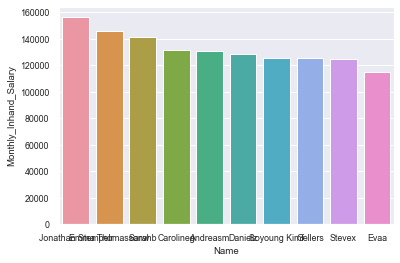

In [11]:
sns.barplot(data = x , y =x['Monthly_Inhand_Salary'] , x= x['Name'] )

### what is the type of loan is most taked 
### ------------------------------------------------------

In [12]:
x= df.groupby('Type_of_Loan')['Num_of_Loan'].count().sort_values(ascending= False).head(10).to_frame()
RI(x)

,Type_of_Loan,Num_of_Loan
0,Not Specified,759
1,Personal Loan,728
2,Debt Consolidation Loan,707
3,Student Loan,704
4,Credit-Builder Loan,700
5,Mortgage Loan,665
6,Auto Loan,653
7,Home Equity Loan,652
8,Payday Loan,606
9,"Personal Loan, and Student Loan",178


<AxesSubplot:xlabel='Num_of_Loan', ylabel='Type_of_Loan'>

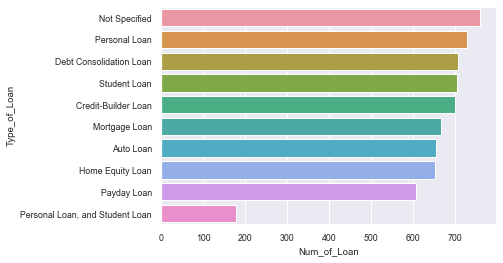

In [13]:
sns.barplot(data = x , y = x['Type_of_Loan'] , x =x['Num_of_Loan'])

### what is most interst rate have a cridet most cridet mix 
### ----------------------------------------------------------------------------

In [14]:
df.groupby(['Monthly_Inhand_Salary','Interest_Rate','Credit_Mix'])['dummy'].count().to_frame()

dummy
Monthly_Inhand_Salary Interest_Rate Credit_Mix       
303.645417            20            Bad             3
319.556250            29            Bad             3
332.128333            11            Good            1
                      20            Standard        5
332.431250            22            Standard        5
...                                               ...
15090.076667          9             Good            5
15115.190000          2             Good            5
15136.696667          5             Good            5
15167.180000          5             Good            3
15204.633333          1             Good            2

[12128 rows x 1 columns]

### comparison between Payment_of_Min_Amount Credit_Mix in Monthly_Inhand_Salary
### --------------------------------------------------------------------------------------------------------------------------

In [15]:
pd.pivot_table(data = df , index='Payment_of_Min_Amount' , columns='Credit_Mix' , values='Monthly_Inhand_Salary' , aggfunc='sum' )

Credit_Mix,Bad,Good,Standard
Payment_of_Min_Amount,,,
NM,4.769484e+06,8.261742e+06,1.123869e+07
No,NaN,5.913663e+07,1.937223e+07
Yes,3.385265e+07,NaN,6.326783e+07


### extract new feature spend by Monthly_Balance  and Amount_invested_monthly
### ------------------------------------------------------------------------------------------------------------------|

In [16]:
df['Spend_every_month'] = df['Monthly_Balance'] - df['Amount_invested_monthly']

In [17]:
df['Spend_every_month']

0        249.510342
1         23.993235
2         66.221249
3        333.338951
4        366.398802
            ...    
50754    220.815068
50755    285.284554
50756    269.460307
50757     55.474889
50758    302.700082
Name: Spend_every_month, Length: 50759, dtype: float64

### what is most 10 customers spended 
### -----------------------------------------------------

In [18]:
x=df.groupby(['ID','Name'])['Spend_every_month'].sum().sort_values(ascending =False).head(10).to_frame()
RI(x)

,ID,Name,Spend_every_month
0,0x23361,Paul Dayt,1109.480071
1,0x212f1,Ceyda Caglayane,1103.683711
2,0x11b2a,McDillb,1100.504253
3,0xdfad,Antonella Ciancioc,1087.289073
4,0x1d4cb,Bradenc,1083.025359
5,0x242da,Aditi Shahb,1081.898429
6,0x12b28,Kerbere,1081.731066
7,0x1b02f,Araxiac,1080.535618
8,0x4700,Danielz,1078.732518
9,0x23108,Herbertq,1076.324281


<AxesSubplot:xlabel='Spend_every_month', ylabel='Name'>

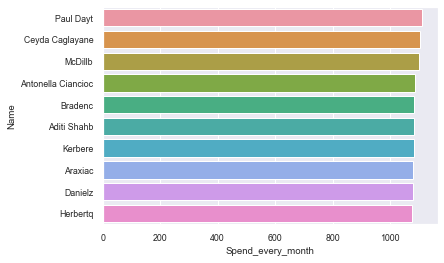

In [19]:
sns.barplot(data = x , x = x['Spend_every_month'] , y =x['Name'])

### Which age group is spending more money

In [30]:
# New column "age_group" with 8 bins between 18 to 88 
df["age_group"] =  pd.cut(df["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58" ,"58-66" , "66-74" , "74-88"],include_lowest=True)
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,dummy,Spend_every_month,age_group
0,0x1604,CUS_0xd40,March,Aaron Maashoh,33,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,0,249.510342,26-34
1,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,0,23.993235,18-26


In [32]:
age_spend = df.groupby("age_group")["Spend_every_month"].sum()
print("Age group (",age_spend.idxmax(),") has max spend.")

Age group ( 58-66 ) has max spend.


### what is most age group spend every month 

In [33]:
age_spend = df.groupby("age_group")['Spend_every_month'].sum().sort_values(ascending=False)

In [34]:
age_spend

age_group
58-66    0.000000e+00
66-74    0.000000e+00
74-88    0.000000e+00
34-42   -3.179060e+06
18-26   -3.333333e+26
50-58   -3.333333e+26
26-34   -6.666667e+26
42-50   -6.666667e+26
Name: Spend_every_month, dtype: float64

### what is most 10 age group in  Amount_invested_monthly

In [35]:
age_invest = df.groupby("age_group")['Amount_invested_monthly'].sum().sort_values(ascending=False)

In [36]:
age_invest

age_group
26-34    8.176062e+06
18-26    7.980682e+06
34-42    7.436500e+06
42-50    4.511560e+06
50-58    1.685487e+06
58-66    0.000000e+00
66-74    0.000000e+00
74-88    0.000000e+00
Name: Amount_invested_monthly, dtype: float64

### what is most 10 age group in  Monthly_Balance
### --------------------------------------------------------------------

In [37]:
age_monthly_balance= df.groupby("age_group")['Monthly_Balance'].sum().sort_values(ascending=False)

In [38]:
age_monthly_balance

age_group
34-42    4.257440e+06
58-66    0.000000e+00
66-74    0.000000e+00
74-88    0.000000e+00
18-26   -3.333333e+26
50-58   -3.333333e+26
26-34   -6.666667e+26
42-50   -6.666667e+26
Name: Monthly_Balance, dtype: float64

### extract number of years for each cridet card 
### ---------------------------------------------------------------

In [39]:
df['Credit_History_Age_years']=df['Credit_History_Age'].apply(lambda x : x.split("and")[0])
## clean feature

In [40]:
df.drop("Credit_History_Age" , axis =1 , inplace = True)

### Comparison of monthly spend for amount invisted and Credit_Score 

In [41]:
pd.pivot_table(data =df , index = 'Credit_Score' , columns='Credit_History_Age_years'
               , values = 'Amount_invested_monthly', aggfunc='sum'   )

Credit_History_Age_years,0 Years,1 Years,10 Years,11 Years,12 Years,13 Years,14 Years,15 Years,16 Years,17 Years,18 Years,19 Years,2 Years,20 Years,21 Years,22 Years,23 Years,24 Years,25 Years,26 Years,27 Years,28 Years,29 Years,3 Years,30 Years,31 Years,32 Years,33 Years,4 Years,5 Years,6 Years,7 Years,8 Years,9 Years
Credit_Score,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Good,10360.797523,1287.054557,14628.358840,19048.681735,46517.636352,30986.982143,4571.404808,156149.421352,214790.413686,242020.141460,239998.607396,219373.471260,12026.650390,217410.080035,209886.251940,229067.021313,233613.903498,260293.061786,301584.432088,200715.222183,236756.747129,299151.468881,319074.000840,2479.046475,370493.868799,200844.797807,347708.061615,97350.097611,12002.880585,19989.307439,29066.361608,28578.156312,75361.926405,6195.458465
Poor,135451.699459,157815.822560,599597.699342,515302.715631,640011.005870,603450.428907,380205.484326,498410.296905,477464.955327,528846.409446,502460.473356,580728.500264,125806.510774,239748.807863,134363.488445,130741.668716,107684.104405,115496.067903,97288.241808,105585.669589,80858.247591,69884.565149,79218.491288,174409.747866,108952.704150,112842.826765,122598.562705,38715.182426,122602.151918,327741.035215,621927.243438,376347.014717,485766.935880,543660.254933
Standard,94949.186912,200497.241669,460392.190032,518953.774170,590476.439915,523483.128375,454795.563486,510964.016027,861718.688832,966087.204323,938181.172614,836651.098278,178225.782871,665624.865438,536212.674362,521794.482667,407747.455829,570196.701670,405083.128690,530960.835219,465658.661269,510967.937496,514206.088500,173641.172227,604245.346279,614480.920722,616357.429400,185300.058683,172765.178211,388312.450663,582001.670959,461620.792711,375594.343466,444126.296889


### compareison Credit_History_Age_years , Credit_Mix

In [42]:
df.groupby(['Credit_History_Age_years','Credit_Mix'])['Credit_Mix'].count().head(25).to_frame()

Credit_Mix
Credit_History_Age_years Credit_Mix            
0 Years                  Bad                331
                         Good                 1
                         Standard             3
1 Years                  Bad                640
                         Good                 1
                         Standard             6
10 Years                 Bad                931
                         Good                 4
                         Standard           779
11 Years                 Bad                907
                         Good                10
                         Standard           840
12 Years                 Bad                984
                         Good                 9
                         Standard           858
13 Years                 Bad               1042
                         Good                12
                         Standard           942
14 Years                 Bad                624
                         Good                 4
                         Standard           917
15 Years                 Bad                459
                         Good               386
                         Standard          1271
16 Years                 Bad                360

### check corrliaation between data 
### ----------------------------------------------

C:\Users\eslam\AppData\Local\Temp\ipykernel_9024\783128787.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


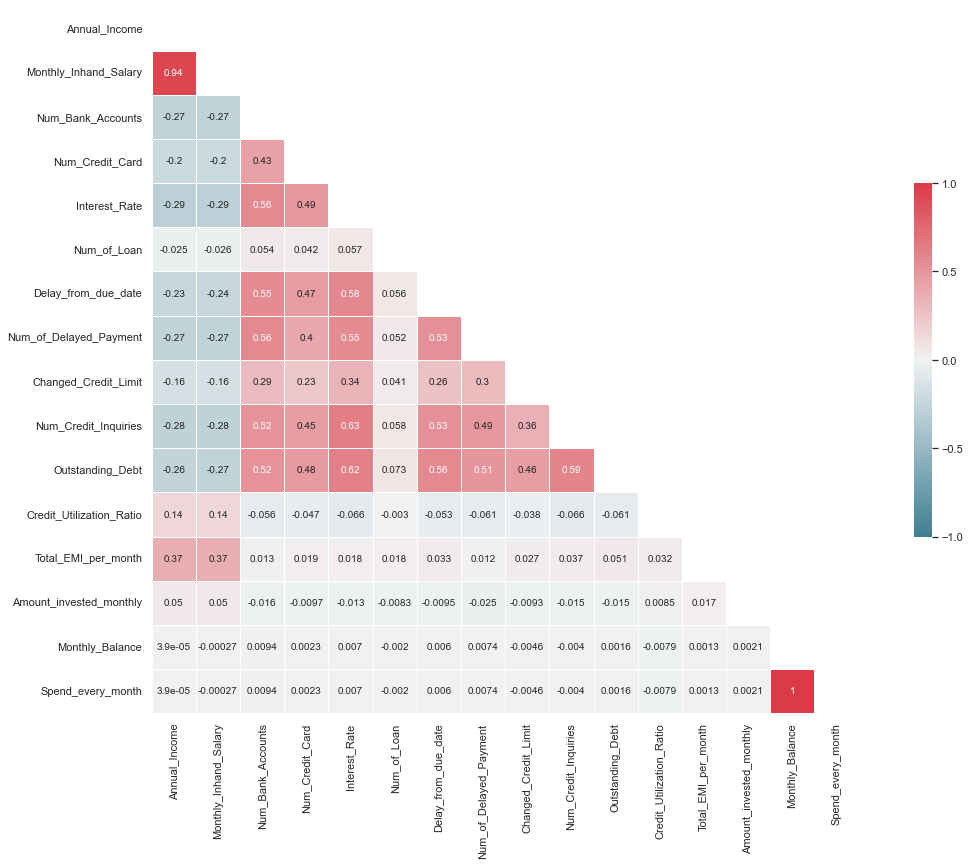

In [43]:
sns.set(style="white", font_scale=1)
numeric = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Spend_every_month']
corr = df[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=10)
# plt.show()

### what is top age in Payment_of_Min_Amount
### ----------------------------------------------------------------

In [44]:
df.groupby(["Age",'Payment_of_Min_Amount'])['dummy'].count().head(25).to_frame()

dummy
Age Payment_of_Min_Amount       
14  NM                        88
    Yes                      642
15  NM                       107
    Yes                      821
16  NM                       115
    Yes                      764
17  NM                       107
    Yes                      761
18  NM                       146
    No                       306
    Yes                      859
19  NM                       190
    No                       371
    Yes                      877
20  NM                       166
    No                       350
    Yes                      853
21  NM                       181
    No                       356
    Yes                      869
22  NM                       187
    No                       363
    Yes                      873
23  NM                       176
    No                       406

### what is most age group delay 

In [45]:
x= df.groupby(['age_group', 'Delay_from_due_date'])['dummy'].count().to_frame()
RI(x)

,age_group,Delay_from_due_date,dummy
0,18-26,-5,3
1,18-26,-4,5
2,18-26,-3,12
3,18-26,-2,18
4,18-26,-1,15
...,...,...,...
579,74-88,63,0
580,74-88,64,0
581,74-88,65,0
582,74-88,66,0


### what is most customer have Outstanding_Debt 
### --------------------------------------------------------------------

In [46]:
df.groupby("Name")['Outstanding_Debt'].sum().sort_values(ascending=False).to_frame()

,Outstanding_Debt
Name,
Langep,56793.73
McCooll,56104.93
Rick Rothackerc,49607.54
Johns,49058.15
Johnd,48660.90
...,...
Jedb,3.92
Jennifer Sabay,3.90
Sarah N.p,3.80
